In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
import torchvision
import torch.nn as nn
from torch.nn import functional as F

from PIL import Image

import zipfile
from pathlib import Path
from tqdm.notebook import tqdm

## Exctract data

### Exctract zip function

In [2]:
def extract_zip_data(path_to_zip, extract_dir):
    with zipfile.ZipFile(path_to_zip, 'r') as zip_file:
        zip_file.extractall(extract_dir)

In [3]:
TRAIN_ZIP = 'train.csv.zip'
TEST_ZIP = 'test.csv.zip'
EXTRACT_DIR = 'data'

### Extract zip archives

In [4]:
extract_zip_data(Path(EXTRACT_DIR)/TRAIN_ZIP, EXTRACT_DIR)
extract_zip_data(Path(EXTRACT_DIR)/TEST_ZIP, EXTRACT_DIR)

### Check

In [10]:
Path.ls = lambda x: [o.name for o in x.iterdir()]

In [11]:
Path(EXTRACT_DIR).ls()

['.DS_Store',
 'test.csv',
 'train.csv',
 '.ipynb_checkpoints',
 'test.csv.zip',
 'train.csv.zip',
 'sample_submission.csv']

## Let's take 3 and 7 for starters

In [12]:
df_train = pd.read_csv(Path(EXTRACT_DIR)/'train.csv')
train_data, test_data = train_test_split(df_train, test_size=0.2, random_state=42, shuffle=True)
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
threes_train_data = train_data[train_data['label'] == 3]
threes_train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24432,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11189,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11788,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35681,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21766,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
sevens_train_data = train_data[train_data['label'] == 7]
sevens_train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
30291,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16089,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27558,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8869,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Let's draw numbers

In [15]:
image3_array = threes_train_data.iloc[0].drop(['label'], axis=0).to_numpy().reshape((-1, 28))
image3_array = pd.DataFrame(image3_array)

In [16]:
image3_array

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,18,58,144,245,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,147,217,253,253,253,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,210,245,129,44,44,...,89,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,9,10,0,0,0,...,242,19,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,93,0,0,0,0,0,0,0,0,0


In [17]:
image3_array.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,18,58,144,245,254,254,254,130,34,34,31,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,147,217,253,253,253,213,187,187,254,253,253,237,52,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,210,245,129,44,44,17,0,0,44,44,135,249,244,89,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,9,10,0,0,0,0,0,0,0,0,0,31,253,242,19,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,169,253,93,0,0,0,0,0,0,0,0,0


## First step

Let's try to find a mean value for each pixel of threes and sevens

In [18]:
threes_train = threes_train_data.drop(['label'], axis=1).to_numpy()
sevens_train = sevens_train_data.drop(['label'], axis=1).to_numpy()

In [19]:
three_tensors = [torch.tensor(num.reshape(28, 28)) for num in tqdm(threes_train)]
sevens_tensors = [torch.tensor(num.reshape(28, 28)) for num in tqdm(sevens_train)]

  0%|          | 0/3414 [00:00<?, ?it/s]

  0%|          | 0/3508 [00:00<?, ?it/s]

In [20]:
len(three_tensors)

3414

In [21]:
len(sevens_tensors)

3508

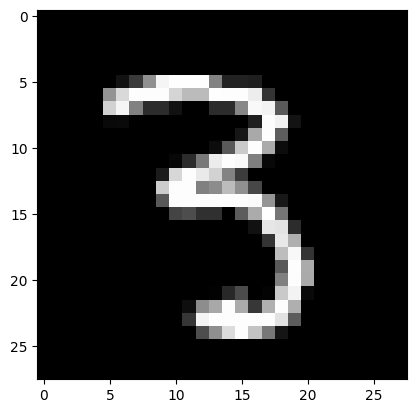

In [22]:
plt.imshow(three_tensors[0], cmap='gray')
None

Stack all images into one three-dimensional tensor

In [23]:
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_sevens = torch.stack(sevens_tensors).float() / 255

In [24]:
stacked_threes.shape

torch.Size([3414, 28, 28])

In [25]:
stacked_sevens.shape

torch.Size([3508, 28, 28])

In [26]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

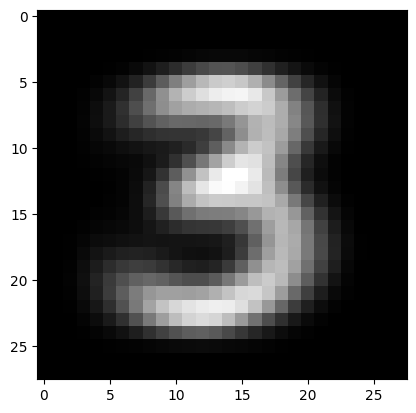

In [27]:
plt.imshow(mean3, cmap='gray')
None

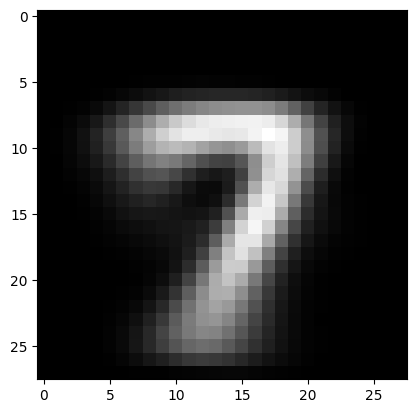

In [28]:
plt.imshow(mean7, cmap='gray')
None

Let's take the first three number from the tensor

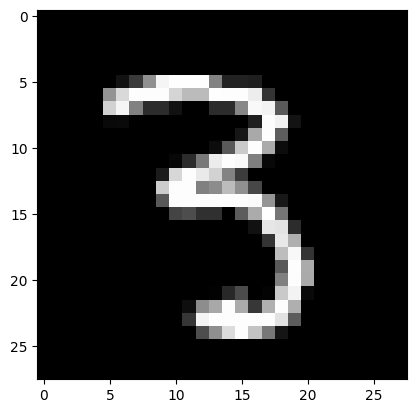

In [29]:
a3 = stacked_threes[0]
plt.imshow(a3, cmap='gray')
None

**L1** and **L2**

In [30]:
dist_3_l1 = (a3 - mean3).abs().mean()
dist_3_l2 = ((a3 - mean3)**2).mean().sqrt()

In [31]:
dist_3_l1

tensor(0.1194)

In [32]:
dist_3_l2

tensor(0.2157)

In [33]:
dist_7_l1 = (a3 - mean7).abs().mean()
dist_7_l2 = ((a3 - mean7)**2).mean().sqrt()

In [34]:
dist_7_l1

tensor(0.1528)

In [35]:
dist_7_l2

tensor(0.2926)

PyTorch has these loss function in torch.nn.functional module abbreviated F

In [36]:
F.l1_loss(a3.float(), mean7)

tensor(0.1528)

In [37]:
F.mse_loss(a3.float(), mean7).sqrt()

tensor(0.2926)

The difference between the L1 norm and the mse norm is that the latter reflects serious errors more vividly than the former, but is less expressive with respect to small ones

## Calculate metrics with broadcasting

In [38]:
threes_test_data = test_data[test_data['label'] == 3]
sevens_test_data = test_data[test_data['label'] == 7]

In [39]:
threes_test = threes_test_data.drop(['label'], axis=1).to_numpy()
sevens_test = sevens_test_data.drop(['label'], axis=1).to_numpy()

In [43]:
valid_3_tens = torch.stack([torch.tensor(num.reshape(28, 28)) for num in tqdm(threes_test)])
valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = torch.stack([torch.tensor(num.reshape(28, 28)) for num in tqdm(sevens_test)])
valid_7_tens = valid_7_tens.float() / 255

  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/893 [00:00<?, ?it/s]

In [44]:
valid_3_tens.shape

torch.Size([937, 28, 28])

In [45]:
valid_7_tens.shape

torch.Size([893, 28, 28])

In [46]:
def mnist_distance(a, b):
    return (a - b).abs().mean((-1, -2))

mean((-1, -2)) - (-1, -2) last and penultimate axes. The last two axes are horizontal and vertical measurements of the image

In [47]:
mnist_distance(a3, mean3)

tensor(0.1194)

### Broadcasting

In [48]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)

In [50]:
valid_3_dist.shape

torch.Size([937])

In [51]:
valid_3_dist[:10]

tensor([0.1703, 0.1360, 0.1366, 0.1209, 0.1228, 0.1189, 0.1609, 0.1079, 0.1022,
        0.1379])

In [52]:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [53]:
is_3(a3)

tensor(True)

In [55]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True, False,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

In [57]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

In [58]:
accuracy_3s

tensor(0.8922)

In [59]:
accuracy_7s

tensor(0.9910)

Looks good, but the threes and sevens are very different in appearance, and so far we classify only two of the ten digits